## Data Visualization

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

## 1. Published Open Dataset over years

In [2]:
df_dataset = pd.read_csv("ismir_2011_2020_dataset.csv")

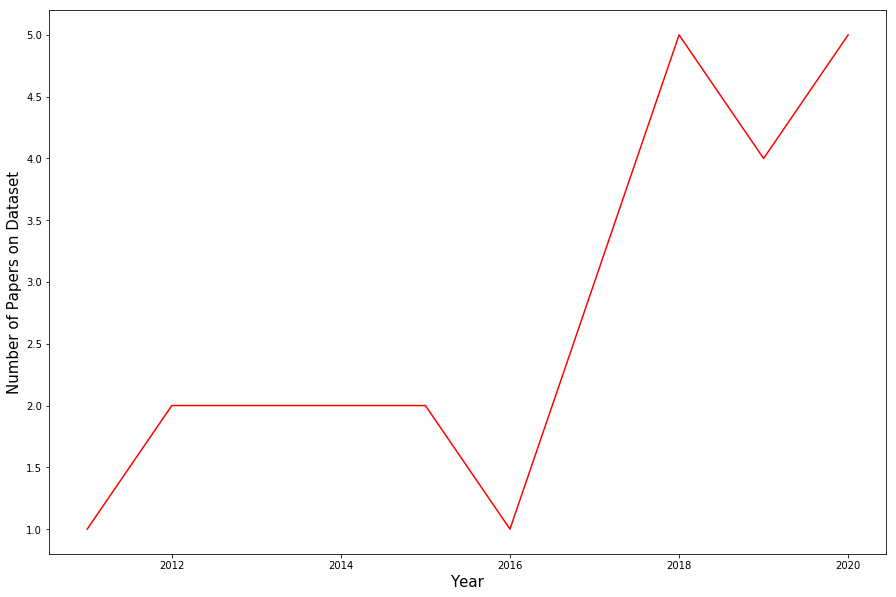

In [3]:
plt.figure(figsize=(15,10))
plt.plot(df_dataset['year'].value_counts().sort_index().index, df_dataset['year'].value_counts().sort_index().tolist(), color="red")
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of Papers on Dataset", fontsize=15)
plt.show()

## 2. Number of Papers with Open Code over years

In [4]:
df_implementations = pd.read_csv("ismir_2011_2020_with_implementation.csv")

Int64Index([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011], dtype='int64')
2020    59
2019    51
2018    44
2017    33
2016    21
2015    17
2014    12
2013     9
2012     8
2011     4
Name: year, dtype: int64


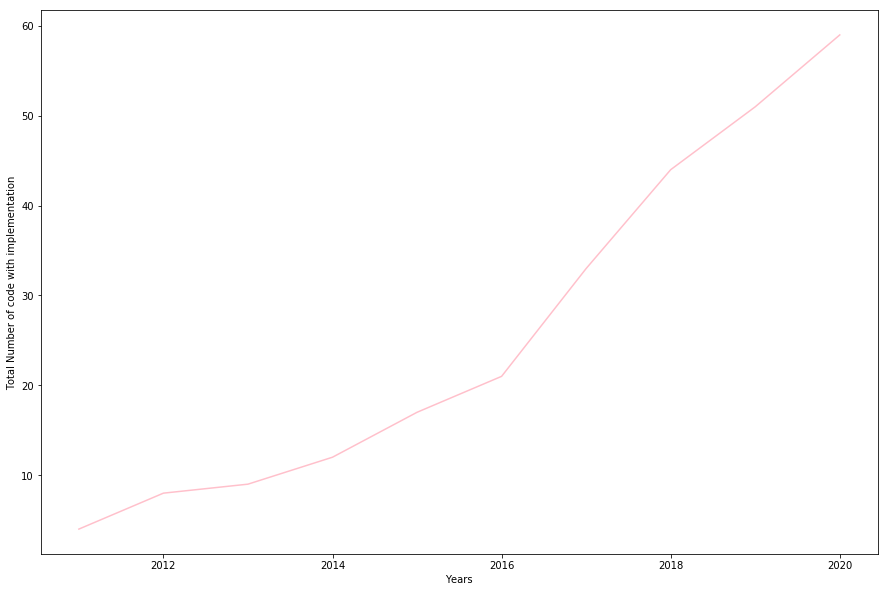

In [5]:
plt.figure(figsize=(15,10))
print(df_implementations['year'].value_counts().index)
print(df_implementations['year'].value_counts())
plt.plot(df_implementations['year'].value_counts().index, df_implementations['year'].value_counts(),color="pink")
plt.xlabel('Years')
plt.ylabel('Total Number of code with implementation')
plt.show()

## 3. Total Published Paper vs. Total Published Paper with Code over years

In [6]:
df_ismir_total_paper = pd.read_csv("ismir_2011_2020_papers.csv")

In [7]:
total = df_ismir_total_paper.groupby('year').count().reset_index()
total.rename(columns={'titles':'total'},inplace=True)

In [8]:
code = df_implementations.groupby('year').count().reset_index()
code.rename(columns={'titles':'code'},inplace=True)
code.drop(columns=['year'], inplace=True)

In [9]:
df_merged = pd.concat([total,code],axis=1)
df_merged.set_index('year')

,total,code
year,,
2011,133,4
2012,101,8
2013,98,9
2014,106,12
2015,114,17
2016,113,21
2017,97,33
2018,104,44
2019,114,51


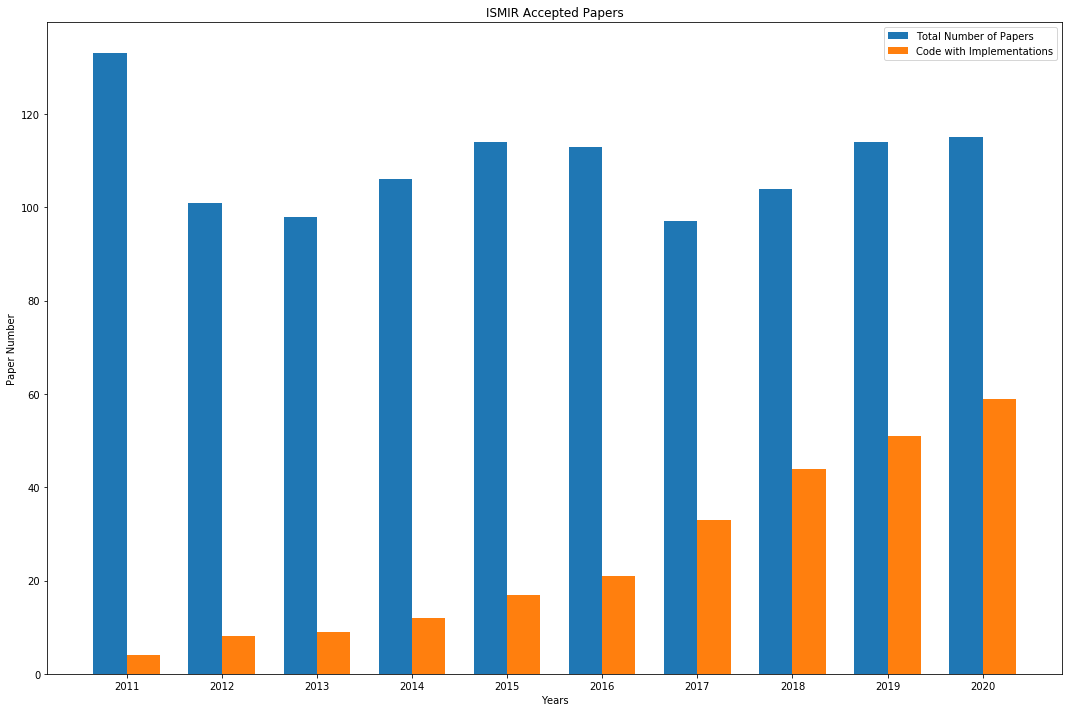

In [10]:
import matplotlib.pyplot as plt
import numpy as np

labels =  df_merged.year.to_list()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, df_merged['total'].to_list(), width, label='Total Number of Papers')
rects2 = ax.bar(x + width/2, df_merged['code'].to_list(), width, label='Code with Implementations')

ax.set_ylabel('Paper Number')
ax.set_xlabel('Years')
ax.set_title('ISMIR Accepted Papers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


## 4. Comparision of Subcategories

In [11]:
df_ismir_code_categ = pd.read_csv("ismir_2011_2020_papers_with_code_categorized.csv")
df_ismir_total_categ = pd.read_csv("ismir_2011_2020_papers_categorized.csv")

In [12]:
df_ismir_code_categ['category'] = df_ismir_code_categ['category'].apply(lambda x: x.split(",")[0])
df_ismir_total_categ['category'] = df_ismir_total_categ['category'].apply(lambda x: x.split(",")[0])

In [13]:
main_categories = ['Recognition / Analysis /Classification', 'Corpora and databases',
       'Transcription and annotations', 'Similarity']

In [14]:
df_ismir_code_categ = df_ismir_code_categ[df_ismir_code_categ['category'].isin(main_categories)]
df_ismir_total_categ = df_ismir_total_categ[df_ismir_total_categ['category'].isin(main_categories)]

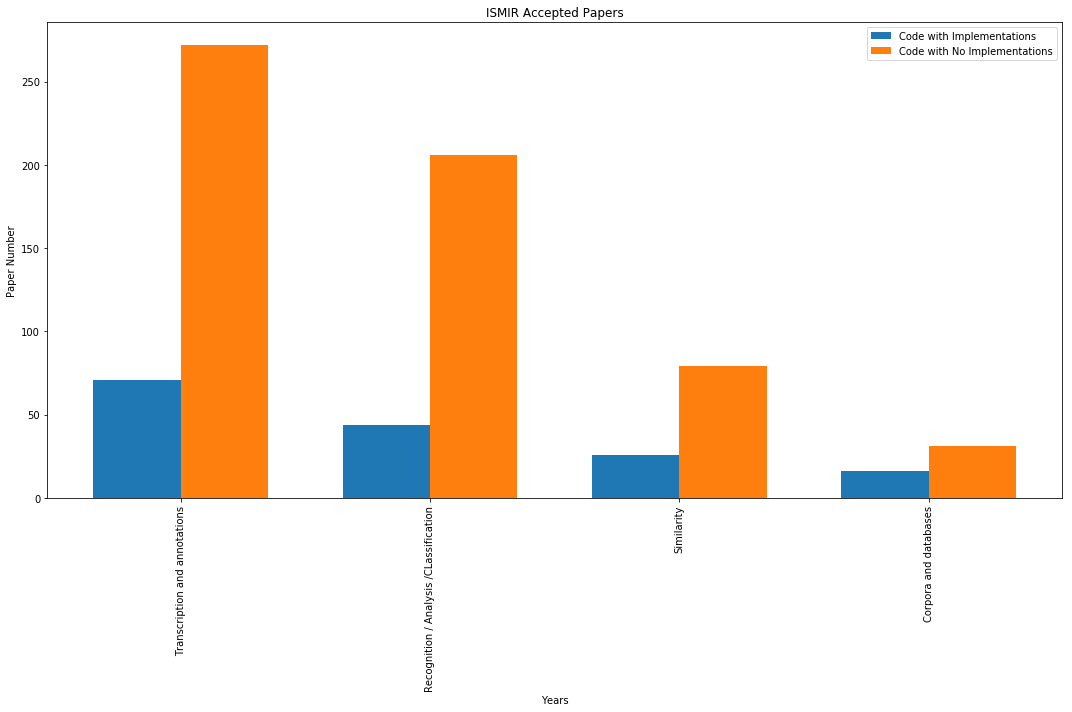

In [15]:
import matplotlib.pyplot as plt
import numpy as np

labels =  ['Transcription and annotations', 'Recognition / Analysis /CLassification', 'Similarity', 'Corpora and databases']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, df_ismir_code_categ['category'].value_counts().to_list(), width, label='Code with Implementations')
rects1 = ax.bar(x + width/2, df_ismir_total_categ['category'].value_counts().to_list(), width, label='Code with No Implementations')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Paper Number')
ax.set_xlabel('Years')
ax.set_title('ISMIR Accepted Papers')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()
